### Introduction
Titanic created quite a stir when it departed for its maiden voyage from Southampton, England, on April 10,1912. After stops in Cherbourg, France, and Queenstown, Ireland, the ship set sail for New york with 891 passengers and crew the expression then used in the shipping inustry, usually in connection with a sinking-on board. Using the provide data set and knowledge gained from Udacity Data Analysis Nanodegree, I would like to factors made more to survive interms of : 
### 1) Genders: Which genders survived with a higher count, Male or Female?
### 2) Pclass: Which Pclass survived the most ?, and 
### 3) Ages: Which ages group survived the most? 
Now, am currently using the Jupyter notebook, python and the number of libraries (pandas, numpy, matplotlib and seaborn) gained knowldege from Udacity Data Analysis Nanodegree program.

### Data Processing
### Preapre Python

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('C:\\Users\\nebiyous\\Desktop\\Titanic\\titanic-data.csv')
df = pd.read_csv(r'C:\Users\nebiyous\Desktop\Titanic\titanic-data.csv')

df = pd.read_csv('C:/Users/nebiyous/Desktop/Titanic/titanic-data.csv')



Populating the interactive namespace from numpy and matplotlib


### The Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Exclude from the data analysis.
I am exclude Name,SibSp,Parch, Ticket, Fare, Cabin and Embarked. The reason I excluded these lists are:(f.ex.)the Name are specfic for individuals person's of first and last name. 

In [3]:
del df['Name']
del df['SibSp']
del df['Parch']
del df['Ticket']
del df['Fare']
del df['Cabin']
del df['Embarked']

### Sample Data into 2 samples
To decide should if I ignored the rows with the missing age or fill the missing values with the mean, first to split the sample data into two samples with filled age and without age. 
### Does the sample have more filled with age or without age? 

In [4]:
with_age = df[df['Age'].notnull()]
without_age = df[df['Age'].isnull()]

### t test for independent variables
To be able to ignore the data without the age, I should be sure that passengers in these two samples are likely to have the similar survival rate. As these are  two independent 2 samples, t test for independent variables might help me.
I'm using the existing in scipy.stats function to perform t test for independent variables. 

In [5]:
from scipy.stats import ttest_ind
ttest_ind(with_age['Survived'], without_age['Survived'])

Ttest_indResult(statistic=2.7606993230995345, pvalue=0.0058865348400755626)

The result of the ttest shows the significant difference of considered samples. Consequently, I'm going to substitute the missing values with the mean age.

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


Now we can see that all columns have identical length. Let's see some descriptive statistics from built in the pandas library function describe.

In [7]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age
count,891.000000,891.000000,891.000000,891,891.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,male,NaN
freq,NaN,NaN,NaN,577,NaN
mean,446.000000,0.383838,2.308642,NaN,29.699118
std,257.353842,0.486592,0.836071,NaN,13.002015
min,1.000000,0.000000,1.000000,NaN,0.420000
25%,223.500000,0.000000,2.000000,NaN,22.000000
50%,446.000000,0.000000,3.000000,NaN,29.699118
75%,668.500000,1.000000,3.000000,NaN,35.000000


### The Pclass group
I would like to know more of how the survival rate depends from different independent variables. Am going to visualize the data using bar plots. 

### Which part of classes are more likely to survived?

Populating the interactive namespace from numpy and matplotlib


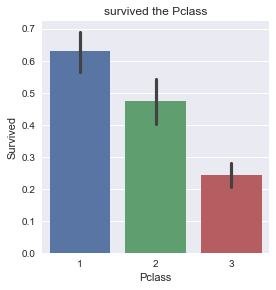

In [8]:
%pylab inline
import seaborn as sns
sns.factorplot('Pclass','Survived',hue_order='Age',data=df, kind='bar')
plt.title ('survived the Pclass')



### The Gender Group 
Now, am gone continue to know how the survival rate depends from different independent variables. Am going to visualize the data using bar plots. 
### Which genders survived with a higher count, Male or Female?


Populating the interactive namespace from numpy and matplotlib


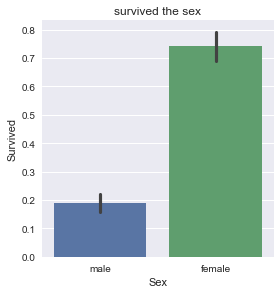

In [9]:
%pylab inline
import seaborn as sns
sns.factorplot("Sex",'Survived',hue_order="Sex",data=df,kind='bar')
plt.title ('survived the sex')

When am looking the above plots, it seems to me that females had more chances to survive than males, as well as the passengers of the first class had more chances than the passengers of the second class, and they had more chances than passengers of third class. So, the best place to survive is in the first class and be female.

### Age Group
Now, let's look at the distribution of ages within the groups we defined above. The age distribution of the passengers are shown below: 
### Which ages group survived the most ?

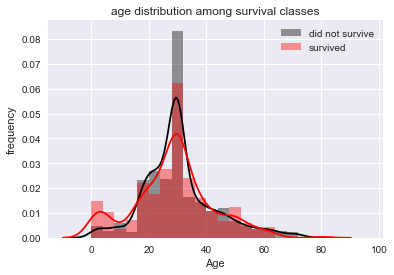

In [10]:
import seaborn as sns
age_bins = np.arange(0,100,4)
sns.distplot(df.loc[(df['Survived']==0) & (~df['Age'].isnull()),'Age'], bins=age_bins,color='k')
sns.distplot(df.loc[(df['Survived']==1) & (~df['Age'].isnull()),'Age'], bins=age_bins,color='r')
#sns.distplot(df.loc[df['Survived']==0) & (~df['Age'].isnull()),'Age'], bins=age_bins)
#sns.distplot(df.loc[df['Survived']==1) & (~df['Age'].isnull()), 'Age'], bins=age_bins)
plt.title ('age distribution among survival classes')
plt.ylabel ('frequency')
plt.legend(['did not survive', 'survived']);

### Conclusion
        
In this project, the Titanic passenger data was analyzed to look at the factors related to the passenger's survivals. The two variables are considered in this project namely: gender and class. Most male survivors are children in the first class while for female, almost all age group in the first and second class have high survivor percentage. For both gender groups, a lot of casualties came from the third class. Regarding, the gender group anlysis, female have more survivor rate than male.
### Limitation of the study
It's important to identify and acknowledge the limitation of the study.
1) Correlation doesn't imply causation. My conclusions are based just on the provided data set. To get the real causation, I should conduct the controlled experiment which is most probably not possible.
2) Using sample instead of the population. It's known, that there were 1317 passengers and 885 crew members on the board of Titanik. Our data set represent just 891 persons. There is no clear mention of the crew members in the data set - so either they are not in the data set or they are hidden among the passengers of the 1, 2 and 3 classes. If the crew memebers are represented in our data set, the overal statistic might be distorted.
3) There are the variables that I don't analyse (Name, SibSp, Parch, cabin, Fare, and Embarked). These variables have bias (based on the description of the data; f.ex.: With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.) or significant amount of data is missed (like for Cabin). To avoid adding noice to the analysis, I've decided to exclude them from the analysis.
4) The dataset is filled with missing values of the age. The missing age values are imputed with the mean and here is the comparison between default (dropped missing values) and imputed age values.

### References
1) Encyclopedia Titanica http://www.encyclopedia-titanica.org/titanic-research-articles/
2) Statistical Consultants Ltd http://www.statisticalconsultants.co.nz/blog/titanic-survival-data.html
3) Stack Overflow https://stackoverflow.com
